# Multi Feature Logistic Regression

In [1]:
import copy

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reading the data

In [2]:
def read_training_set(file):
    data = pd.read_csv(file)
    X_train = data.drop("y", axis=1).values
    y_train = data["y"].values
    return X_train, y_train

## Z-Score Normalization
#### Formula for Z-Score Normilazation:
$z = \frac{x - \mu}{\sigma}$

$\mu$...mean of the data X <br>
$\sigma$... standart deviation of X

In [3]:
def normalize(X):
    mean = np.mean(X)
    sigma = np.std(X)
    X_norm = (X-mean) / sigma
    return X_norm, mean, sigma

# Model Function

In [4]:
def compute_model(X, w, b):
    z = X @ w + b
    y_hat = 1 / (1+ np.exp(-z))
    return y_hat

# Cost Function(Log Loss)
#### Simplified Log Loss Function
$$ L(\hat{y}^{(i)}, y^{(i)}) = -y^{(i)}\log(\hat{y}^{(i)}) - (1 - y^{(i)})\log(1 - \hat{y}^{(i)}) $$

$\hat{y}$...Prediction of model <br>
$y$...Actual value that you are trying to predict

## Unvectorized Implementation:

In [5]:
def unvec_calculate_cost(X, w, b, y):
    m = X.shape[0]
    cost = 0
    for i in range(len(X)):
        y_hat = compute_model(X[i], w, b)
        cost += -y[i] * np.log(y_hat) - (1-y[i]) * np.log(1- y_hat)
    return cost/m

## Vectorized Implemtation (Recommended)

In [6]:
def calculate_cost(X, y, w, b):
    m = X.shape[0]
    y_hat = compute_model(X,w,b)
    cost = np.sum(-y * np.log(y_hat) - (1-y) * np.log(1- y_hat))
    return cost

# Compute Gradient

## Unvectorized

In [7]:
def compute_gradient(x :np.array, y :np.array, w, b):
    m = x.shape[0]
    dj_dw = np.zeros(w.shape[0])
    dj_db = 0

    if m == 0:
        return np.zeros_like(w),


    for i in range(len(x)):
        z = compute_model(x[i], w, b)
        dj_dw += (z - y[i]) * x[i]
        dj_db += z - y[i]

    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

## Vectorized (Recommended)

In [8]:
def compute_gradient(X :np.array, y :np.array, w, b):
    m = X.shape[0]

    if m == 0:
        return np.zeros_like(w), 0

    predictions = compute_model(X, w, b)
    errors = predictions - y

    dj_dw = np.dot(X.T, errors) / m
    dj_db = np.sum(errors) / m
    return dj_dw, dj_db

# Gradient Descent

In [9]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, epsilon=1e-7):

    w = copy.deepcopy(w_in)
    b = b_in
    J_hist = []
    prev_cost = float('inf')

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x,y,w,b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        current_cost = cost_function(x,y,w,b)

        if i % 100 == 0:
            J_hist.append(current_cost)

        if abs(prev_cost - current_cost) < epsilon:
            return w, b, J_hist

        prev_cost = current_cost

    return w, b, J_hist

# Running the model

b,w found by gradient descent: 1.63, [-2.35225055 -0.46795602]


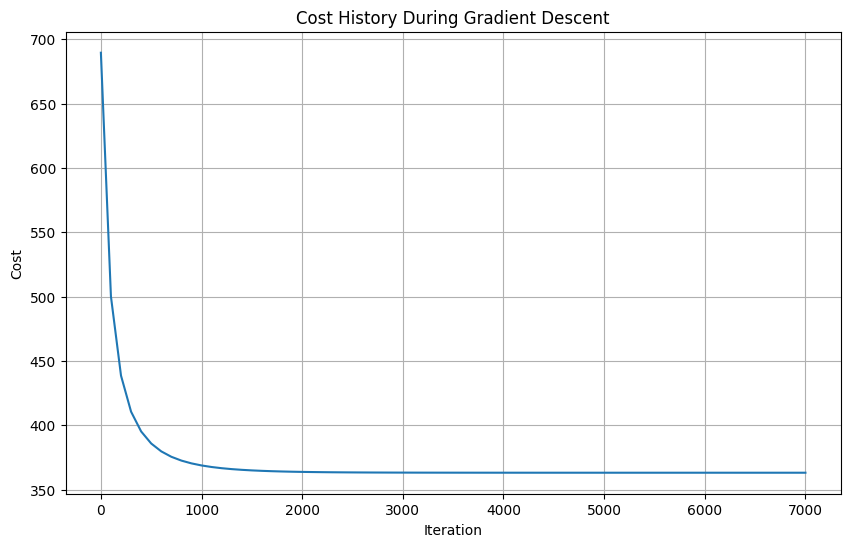

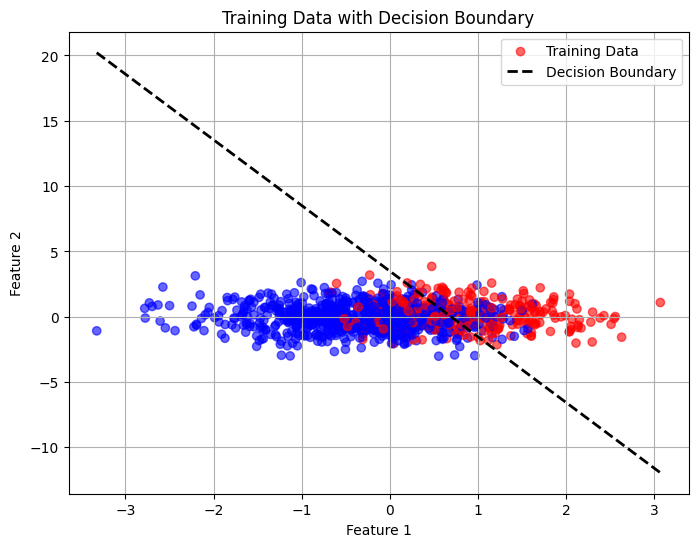

In [11]:
# Running the model and plotting decision boundary
X_train, y_train = read_training_set("training_data.csv")
X_train, mu, sigma = normalize(X_train)

# initialize parameters
w_init = np.zeros(X_train.shape[1])  # Fixed: initialize with correct shape
initial_w = np.zeros_like(w_init)
initial_b = 0.

# some gradient descent settings
iterations = 10000000
alpha = 0.03
epsilon = 1e-7

# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                            calculate_cost, compute_gradient,
                                            alpha, iterations, epsilon)
print(f"b,w found by gradient descent: {b_final:0.2f}, {w_final}")

# Plot cost vs iteration
plt.figure(figsize=(10, 6))
iterations_per_point = 100
iterations_completed = len(J_hist) * iterations_per_point
x_values = range(0, iterations_completed, iterations_per_point)
plt.plot(x_values, J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History During Gradient Descent")
plt.grid(True)
plt.show()

# Plot training data with decision boundary (only for 2 features)
if X_train.shape[1] == 2:
    plt.figure(figsize=(8, 6))
    colors = ['red' if label == 0 else 'blue' for label in y_train]
    plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, alpha=0.6, label="Training Data")

    # Calculate decision boundary: x2 = -(w1*x1 + b)/w2
    x1_vals = np.array([X_train[:, 0].min(), X_train[:, 0].max()])
    if abs(w_final[1]) > 1e-7:
        x2_vals = -(w_final[0] * x1_vals + b_final) / w_final[1]
        plt.plot(x1_vals, x2_vals, 'k--', lw=2, label="Decision Boundary")
    else:
        print("Decision boundary cannot be plotted because w_final[1] is too small.")

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Training Data with Decision Boundary")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Decision boundary plot only available for 2 features.")